In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd

# Absolute path to the CSV file
NEW_DATAPATH = r'D:\Rishi\Data\Raw\dynamic_pricing.csv'  
df = pd.read_csv(NEW_DATAPATH)
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [9]:
import pandas as pd
NEW_DATAPATH = r'D:\Rishi\Data\Raw\dynamic_pricing.csv'  
df = pd.read_csv(NEW_DATAPATH)
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [10]:
#Describe Data
import pandas as pd
NEW_DATAPATH = r'D:\Rishi\Data\Raw\dynamic_pricing.csv'  
df = pd.read_csv(NEW_DATAPATH)
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [11]:
#Check for Duplication

df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

In [12]:
#Missing Values Calculation

df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

********

# EDA Assignment_01

# 1. Creating Data Dictionary 

In [13]:

import pandas as pd
import numpy as np

def get_data_dictionary(data):
    data_dict = pd.DataFrame(columns=['Column', 'Count', 'Unique Values', 'Range', 'Null values', 'Possible Values'])
    
    for col in data.columns:
        count = data[col].shape[0]  # Total count of rows
        unique_values = data[col].nunique()  # Number of unique values in the column
        
        # Defining the range
        if pd.api.types.is_numeric_dtype(data[col]):  # Check if column is numeric
            if unique_values > 1:
                range = f"{data[col].min()} - {data[col].max()}"
        else:
            range = np.nan  
        nulls = data[col].isna().sum() 
        
        # Sampling possible values 
        values = list(data[col].dropna().sample(frac=0.25, replace=False, random_state=42))
        values = list(set(values))[:5]  # Show only up to 5 unique values for preview
        data_dict.loc[len(data_dict)] = [col,count,unique_values,range,nulls,values]
    
    return data_dict

In [15]:
data = pd.read_csv(NEW_DATAPATH)

In [16]:
data_dict = get_data_dictionary(data)
print(data_dict)

                    Column  Count  Unique Values  \
0         Number_of_Riders   1000             81   
1        Number_of_Drivers   1000             79   
2        Location_Category   1000              3   
3  Customer_Loyalty_Status   1000              3   
4     Number_of_Past_Rides   1000            101   
5          Average_Ratings   1000            151   
6          Time_of_Booking   1000              4   
7             Vehicle_Type   1000              2   
8   Expected_Ride_Duration   1000            171   
9  Historical_Cost_of_Ride   1000           1000   

                                    Range  Null values  \
0                                20 - 100            0   
1                                  5 - 89            0   
2                                     NaN            0   
3                                     NaN            0   
4                                 0 - 100            0   
5                               3.5 - 5.0            0   
6                    

# 2. Descriptive Statistics of the Dataset 

In [18]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(NEW_DATAPATH , encoding='ascii')


# Generate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

# 3. Look for the data types of each column and convert the data type of any column if necessary

In [19]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(NEW_DATAPATH, encoding='ascii')


# Display the data types of each column
print("Current data types:")
print(df.dtypes)

# Check for columns that might need conversion
#I examined the data types of each column in the dataset and converted columns with categorical data (like 'Location_Category',etc) to the 'category' data type.


df['Time_of_Booking'] = df['Time_of_Booking'].astype('category')

df['Location_Category'] = df['Location_Category'].astype('category')

df['Customer_Loyalty_Status'] = df['Customer_Loyalty_Status'].astype('category')

df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

df['Average_Ratings'] = df['Average_Ratings'].astype(float)

df['Historical_Cost_of_Ride'] = df['Historical_Cost_of_Ride'].astype(float)

# Display the updated data types
print("\
Updated data types:")
print(df.dtypes)

# Display some basic info about the dataframe
print("\
Dataframe Info:")
df.info()

# Display the first few rows to confirm changes
print("\
First few rows of the updated dataframe:")
print(df.head())

Current data types:
Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object
Updated data types:
Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category          category
Customer_Loyalty_Status    category
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type               category
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   -------------- 

# 4. Printing the Correlation Matrix & Plot (or Heatmap)


Correlation Matrix:
                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of_

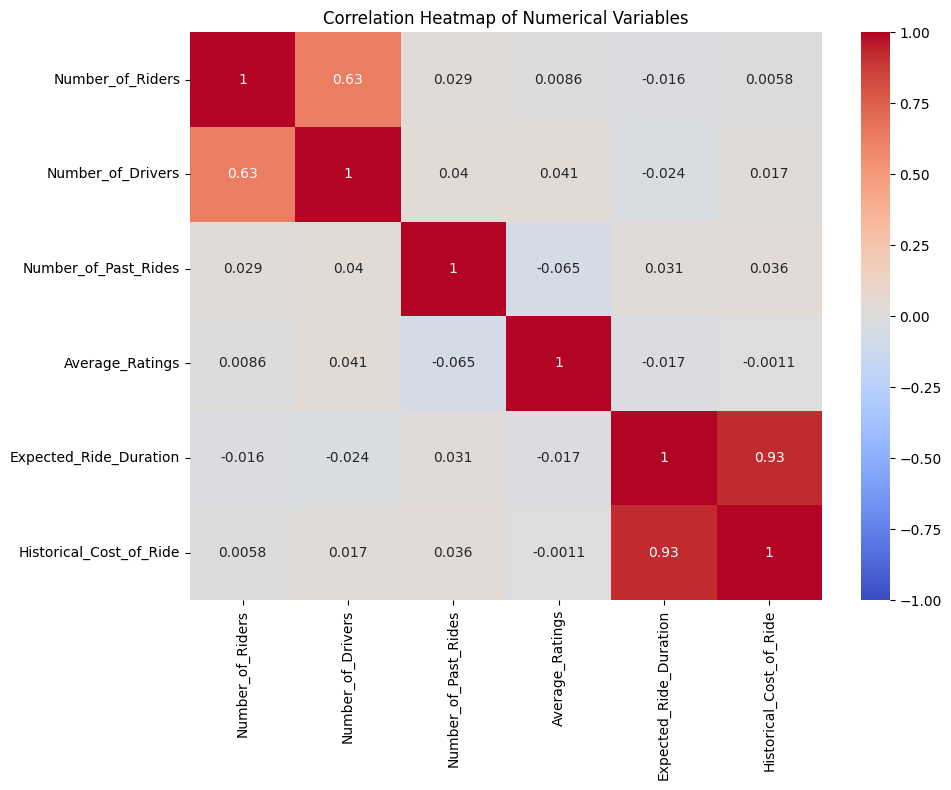

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# 5. No of Drivers vs No of Riders at Different Cross Sections of Data 

C:\Users\Rishi Kakkar\AppData\Local\Temp\ipykernel_34116\3656581906.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Rishi Kakkar\AppData\Local\Temp\ipykernel_34116\3656581906.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Rishi Kakkar\AppData\Local\Temp\ipykernel_34116\3656581906.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Rishi Kakkar\AppData\Local\Temp\ipykernel_34116\3656581906.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

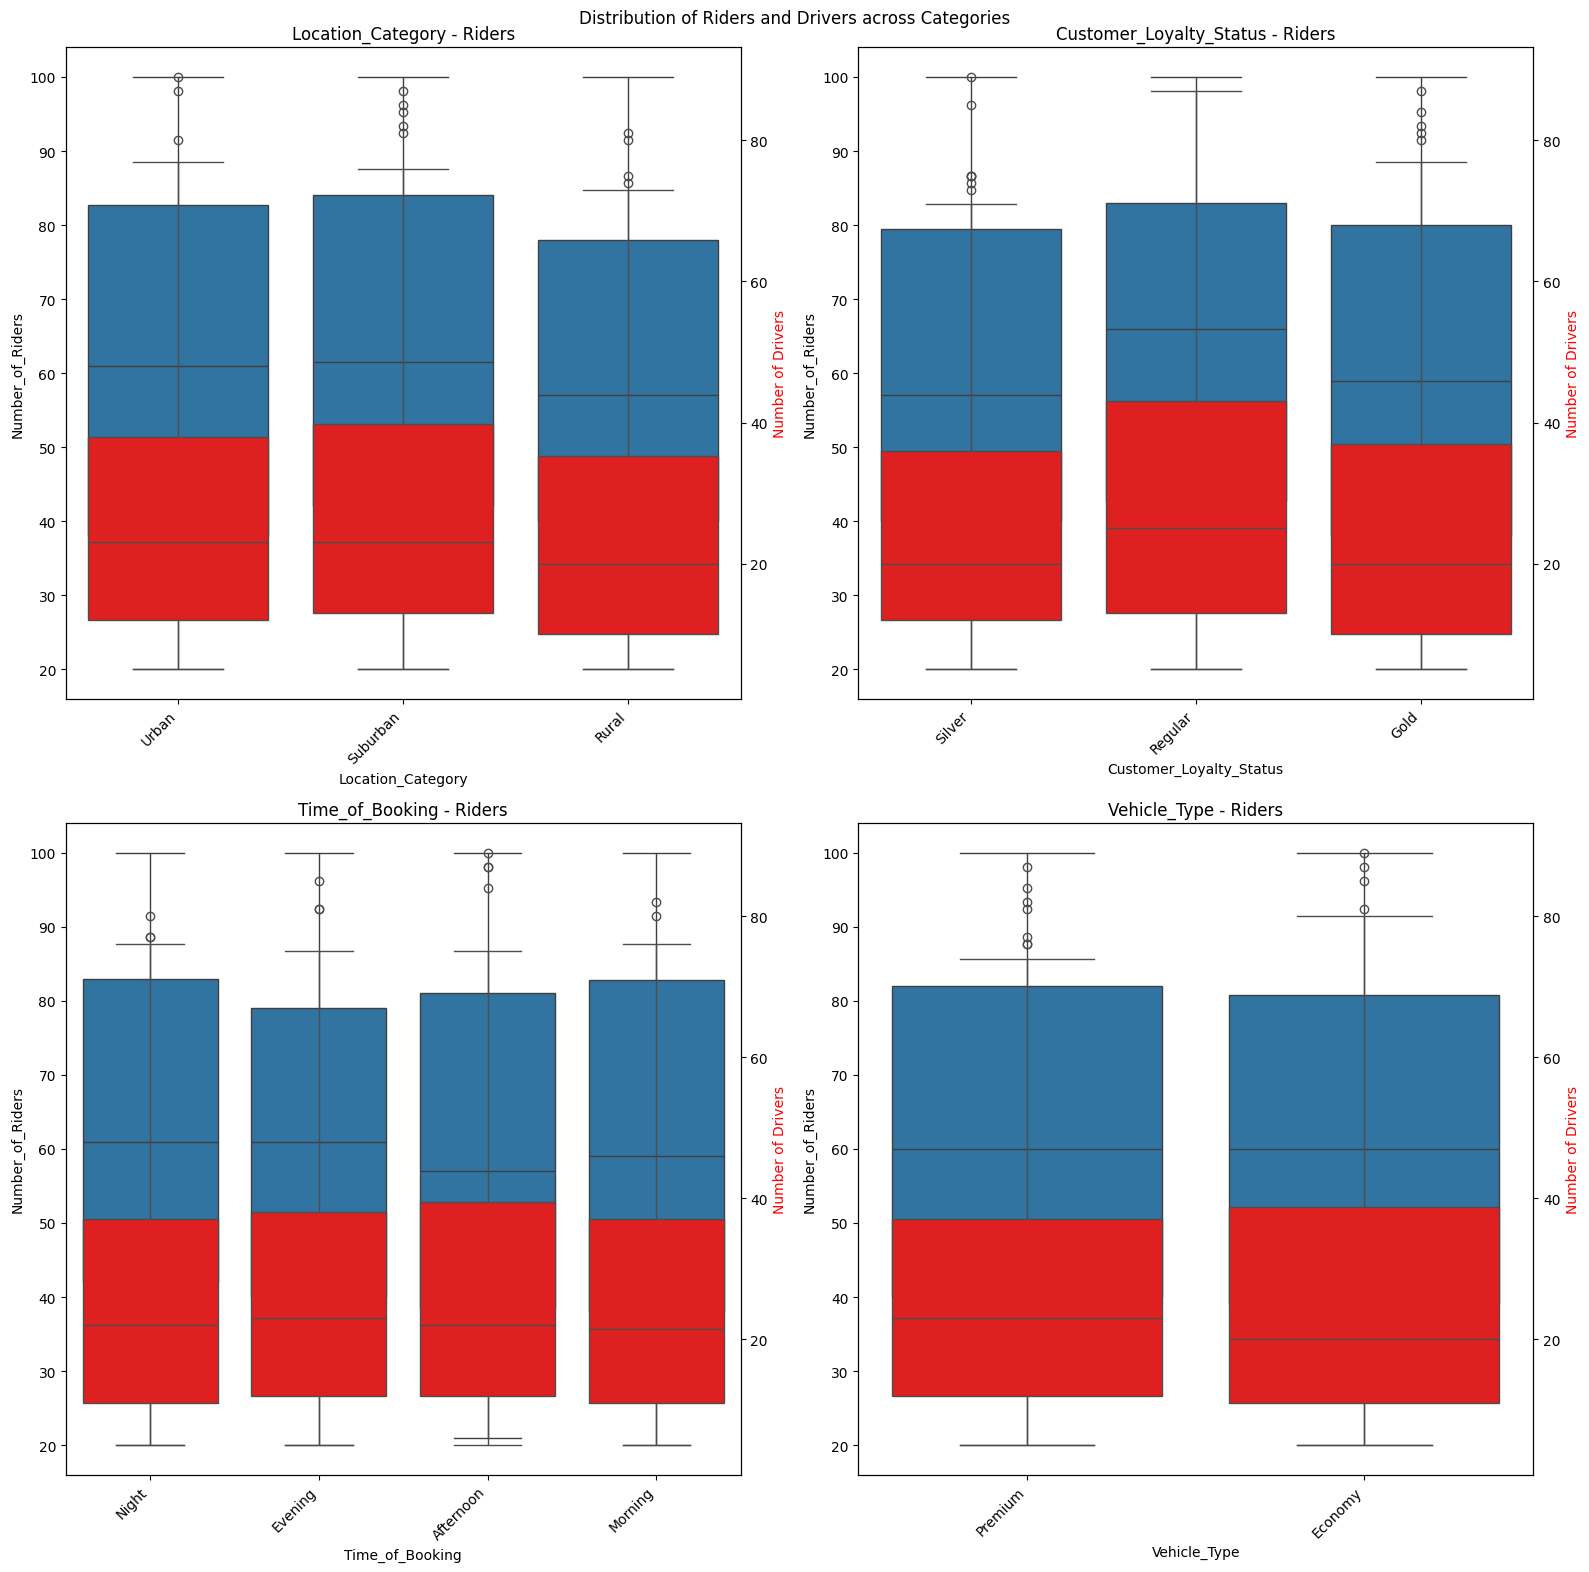

Box plots displayed.
Summary Statistics:
Location_Category:
                  Number_of_Riders                   Number_of_Drivers         \
                              mean median        std              mean median   
Location_Category                                                               
Rural                    57.957831   57.0  22.828628         24.849398   20.0   
Suburban                 62.285714   61.5  23.743287         28.506211   23.0   
Urban                    60.907514   61.0  24.348023         27.881503   23.0   

                              
                         std  
Location_Category             
Rural              17.997690  
Suburban           19.567798  
Urban              19.455050  
Customer_Loyalty_Status:
                        Number_of_Riders                   Number_of_Drivers  \
                                    mean median        std              mean   
Customer_Loyalty_Status                                                        
Go

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv(NEW_DATAPATH, encoding='ascii')
# Box plots for each category
categories = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle("Distribution of Riders and Drivers across Categories")

for cat, ax in zip(categories, axes.flatten()):
    sns.boxplot(data=df, x=cat, y='Number_of_Riders', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'{cat} - Riders')
    
    ax_twin = ax.twinx()
    sns.boxplot(data=df, x=cat, y='Number_of_Drivers', ax=ax_twin, color='red')
    ax_twin.set_ylabel('Number of Drivers', color='red')
    
plt.tight_layout()
plt.show()  # Ensure plots are displayed
print("Box plots displayed.")

# Summary
print("\
Summary Statistics:")
for cat in categories:
    print(f"\
{cat}:")
    print(df.groupby(cat)[['Number_of_Riders', 'Number_of_Drivers']].agg(['mean', 'median', 'std']))

# Correlation analysis
correlation = df['Number_of_Riders'].corr(df['Number_of_Drivers'])
print(f"\
Overall correlation between Number of Riders and Drivers: {correlation:.4f}")



# 6. Supply and Demand difference vs Historical cost


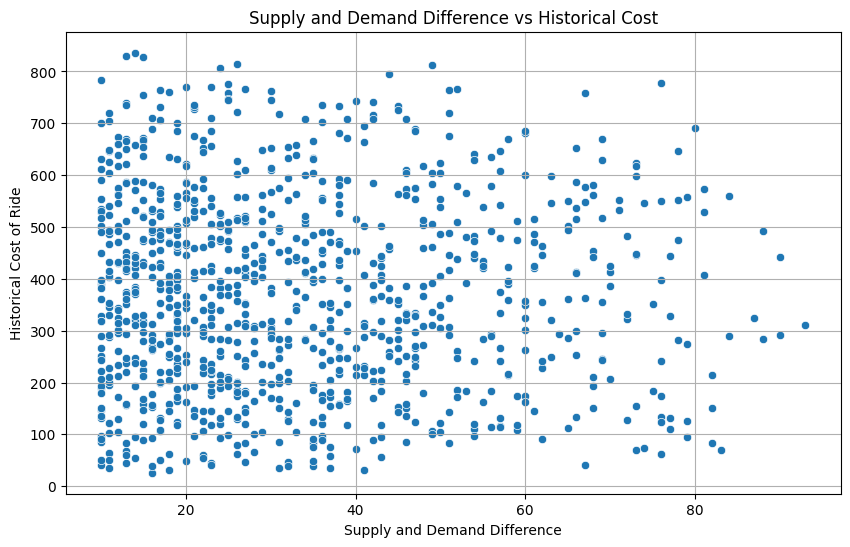

Scatter plot of Supply and Demand Difference vs Historical Cost


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(NEW_DATAPATH, encoding='ascii')

# Calculate the supply-demand difference
df['Supply_Demand_Difference'] = df['Number_of_Riders'] - df['Number_of_Drivers']

# Plot Supply and Demand difference vs Historical cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Supply_Demand_Difference', y='Historical_Cost_of_Ride')
plt.title('Supply and Demand Difference vs Historical Cost')
plt.xlabel('Supply and Demand Difference')
plt.ylabel('Historical Cost of Ride')
plt.grid(True)
plt.show()
print("Scatter plot of Supply and Demand Difference vs Historical Cost")

# 7. Historical Cost vs Any One or Combinations from the 4 Columns

Plots


<Figure size 2000x1500 with 0 Axes>

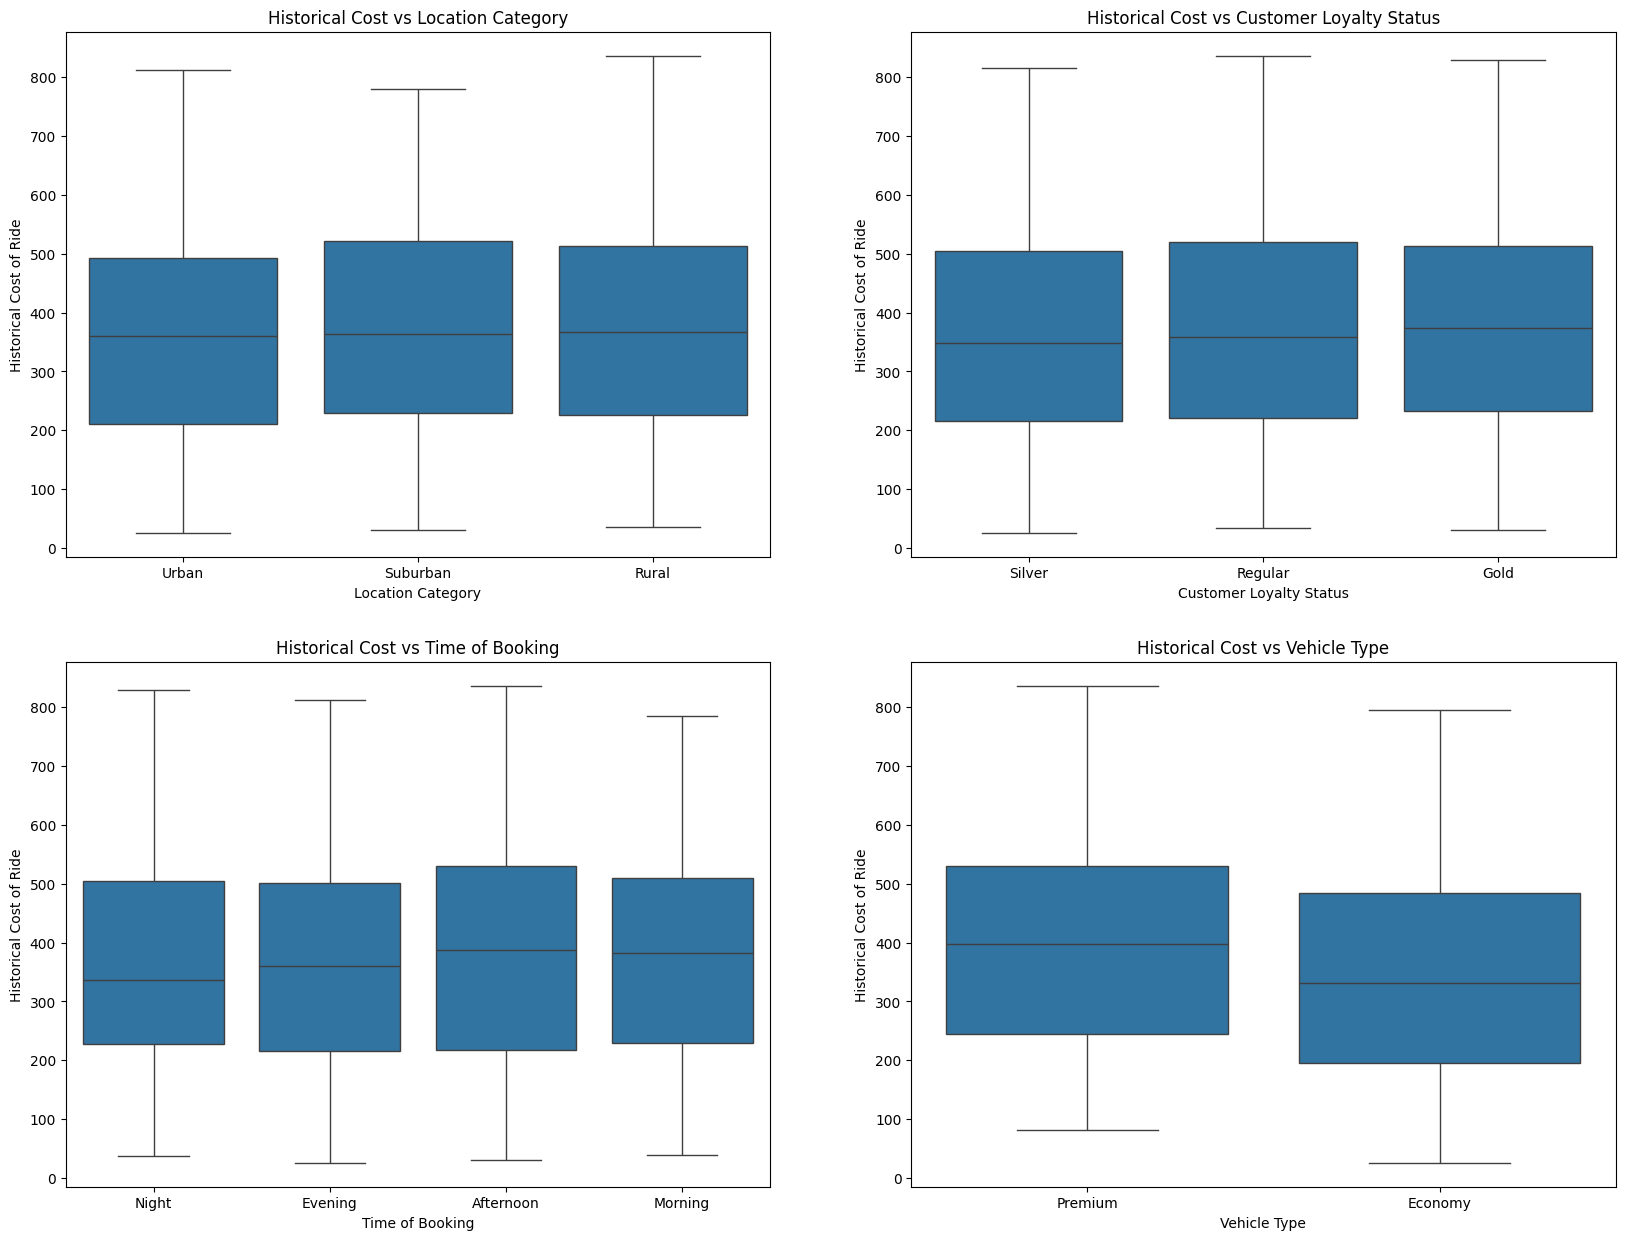

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(NEW_DATAPATH, encoding='ascii')

# Set up the plot
plt.figure(figsize=(20, 15))
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Historical Cost vs Location Category
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Historical Cost vs Location Category')
axs[0, 0].set_xlabel('Location Category')
axs[0, 0].set_ylabel('Historical Cost of Ride')

# Plot 2: Historical Cost vs Customer Loyalty Status
sns.boxplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Historical Cost vs Customer Loyalty Status')
axs[0, 1].set_xlabel('Customer Loyalty Status')
axs[0, 1].set_ylabel('Historical Cost of Ride')

# Plot 3: Historical Cost vs Time of Booking
sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Historical Cost vs Time of Booking')
axs[1, 0].set_xlabel('Time of Booking')
axs[1, 0].set_ylabel('Historical Cost of Ride')

# Plot 4: Historical Cost vs Vehicle Type
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Historical Cost vs Vehicle Type')
axs[1, 1].set_xlabel('Vehicle Type')
axs[1, 1].set_ylabel('Historical Cost of Ride')

print("Plots")

# Assignment_02

# 1. Demand-Supply ratio 

In [41]:
# Demand > Supply --> Price increase
# Demand < Supply --> Price reduction
import pandas as pd
import numpy as np
df = pd.read_csv(NEW_DATAPATH, encoding='ascii')
df["d_s_ratio"] = round(df["Number_of_Riders"]/df["Number_of_Drivers"], 2)       # d_s_ratio = Demand / Supply

df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623,3.235270
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756,2.533629
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449,1.110000
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202,1.660000
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426,2.360000
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504,3.800000
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419,17.600000


# 2. Defining Demand & Supply Class 

In [43]:
df["demand_class"] = np.where(df["Number_of_Riders"]>np.percentile(df["Number_of_Riders"], 75), 
                               "High_demand", "Low_demand")

df["supply_class"] = np.where(df["Number_of_Drivers"]>np.percentile(df["Number_of_Drivers"], 75), 
                               "High_supply", "Low_supply")

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.00,High_demand,High_supply
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.49,Low_demand,High_supply
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.35,Low_demand,Low_supply
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.18,High_demand,Low_supply
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.55,Low_demand,Low_supply


# 3. Defining Demand & Supply Metric 

In [44]:
df["demand_metric"] = np.where(df["demand_class"]=="High_demand", 
                               df["Number_of_Riders"] / np.percentile(df["Number_of_Riders"], 75),
                               df["Number_of_Riders"] / np.percentile(df["Number_of_Riders"], 25))

df["supply_metric"] = np.where(df["supply_class"]=="High_supply", 
                               df["Number_of_Drivers"] / np.percentile(df["Number_of_Drivers"], 75),
                               df["Number_of_Drivers"] / np.percentile(df["Number_of_Drivers"], 25))

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class,demand_metric,supply_metric
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.00,High_demand,High_supply,1.111111,1.184211
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.49,Low_demand,High_supply,1.450000,1.026316
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.35,Low_demand,Low_supply,1.050000,2.818182
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.18,High_demand,Low_supply,1.098765,2.545455
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.55,Low_demand,Low_supply,1.950000,2.000000


# 4. Defining Correction Metric & Adjusting the Ride Cost 

In [45]:
import numpy as np

# Calculate demand-to-supply ratio
df['d_s_ratio'] = df['demand_metric'] / df['supply_metric']

# Set cutoff values for high and low demand situations
high_demand_cut_off = 1.15  # High demand, low supply (Demand > Supply)
low_demand_cut_off = 0.85   # Low demand, high supply (Supply > Demand)


# Define correction metric based on demand-supply ratio
df["correction_metric"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                   abs(df["d_s_ratio"] - high_demand_cut_off),  # Increase price
                                   np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                            abs(df["d_s_ratio"] - low_demand_cut_off),  # Decrease price
                                            0))  # No significant change if within the range

# Adjust the ride cost based on demand and supply condition
df["corrected_cost"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                df["Historical_Cost_of_Ride"] * (1 + df["correction_metric"]),  # Price increase
                                np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                         df["Historical_Cost_of_Ride"] * (1 - df["correction_metric"]),  # Price decrease
                                         df["Historical_Cost_of_Ride"]))  # No change if balanced

df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class,demand_metric,supply_metric,correction_metric,corrected_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0.938272,High_demand,High_supply,1.111111,1.184211,0.000000,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.412821,Low_demand,High_supply,1.450000,1.026316,0.262821,219.572604
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,0.372581,Low_demand,Low_supply,1.050000,2.818182,0.477419,172.344729
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,0.431658,High_demand,Low_supply,1.098765,2.545455,0.418342,273.496237
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,0.975000,Low_demand,Low_supply,1.950000,2.000000,0.000000,579.681422


# 5. Assuming Multipliers to calculate Final Fare

In [46]:
BASE_FARE = 50                                               # Base fare for all rides
PEAK_HOURS_MULTIPLIER = 1.5  # Surge pricing during peak hours
TRAFFIC_MULTIPLIER = 1.2  # Extra fare for heavy traffic
PREMIUM_VEHICLE_MULTIPLIER = 2.0  # Premium vehicle fare multiplier
LOYALTY_DISCOUNTS = {"Regular": 0, "Silver": 0.05, "Gold": 0.10}  # Loyalty-based discounts
PAST_RIDES_DISCOUNT = 0.01  # Discount per 50 past rides
DURATION_TOLERANCE = 5  # Tolerance for expected ride duration (in minutes)
HISTORICAL_COST_ADJUSTMENT_FACTOR = 1.1  # Adjustment for historical ride cost comparison
DURATION_MULTIPLIER = 0.05  # Multiplier for fare increase based on long expected durations (5% per 10 minutes)

# Function to calculate the fare based on various factors
def calculate_fare(base_fare, ride_details):
   
    loyalty_status = ride_details["loyalty_status"]
    past_rides = ride_details["past_rides"]
    vehicle_type = ride_details["vehicle_type"]
    expected_duration = ride_details["expected_duration"]
    actual_duration = ride_details["actual_duration"]
    historical_cost = ride_details["historical_cost"]
    traffic_condition = ride_details["traffic_condition"]
    is_peak_hours = ride_details["is_peak_hours"]
    
    # loyalty discounts
    loyalty_discount = LOYALTY_DISCOUNTS[loyalty_status]
    fare = base_fare * (1 - loyalty_discount)
    
    # Past rides discount
    if past_rides >= 50:
        past_rides_discount = PAST_RIDES_DISCOUNT * (past_rides // 50)  # 1% discount per 50 rides
        fare -= base_fare * past_rides_discount

    # Vehicle type multiplier
    if vehicle_type == "premium":
        fare *= PREMIUM_VEHICLE_MULTIPLIER

    # Traffic-based fare adjustment
    if traffic_condition == "heavy":
        fare *= TRAFFIC_MULTIPLIER

    # Surge pricing during peak hours
    if is_peak_hours:
        fare *= PEAK_HOURS_MULTIPLIER

    #  Expected ride duration adjustment
    if expected_duration > 30:  # If expected ride duration is greater than 30 minutes
        fare += base_fare * DURATION_MULTIPLIER * ((expected_duration - 30) // 10)  # 5% extra for every 10 minutes beyond 30
    
    # Ride duration efficiency bonus (for drivers)
    if actual_duration <= expected_duration + DURATION_TOLERANCE:
        fare += base_fare * 0.1  # Bonus for efficiency

    # Historical cost adjustment
    if historical_cost > fare:
        fare = historical_cost * HISTORICAL_COST_ADJUSTMENT_FACTOR

    # Return the final calculated fare
    return fare

# 6. Revenue Model DevelopmentnAdjusting Prices Based on Demand and Supply Metrics 

In [47]:
import numpy as np
df['d_s_ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

# Demand-Supply Cutoffs
high_demand_cut_off = 1.15  # High demand, low supply
low_demand_cut_off = 0.85   # Low demand, high supply

# Where the number of drivers is 0 (avoid divide-by-zero)
df['d_s_ratio'] = df['d_s_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Define correction metric based on demand-supply ratio
df["correction_metric"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                   abs(df["d_s_ratio"] - high_demand_cut_off),  # Price increase
                                   np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                            abs(df["d_s_ratio"] - low_demand_cut_off),  # Price decrease
                                            0))  # No change if within the balanced range

# Adjust the ride cost based on demand and supply condition
df["corrected_cost"] = np.where(df["d_s_ratio"] > high_demand_cut_off,  # Demand > Supply
                                df["Historical_Cost_of_Ride"] * (1 + df["correction_metric"]),  # Price increase
                                np.where(df["d_s_ratio"] < low_demand_cut_off,  # Supply > Demand
                                         df["Historical_Cost_of_Ride"] * (1 - df["correction_metric"]),  # Price decrease
                                         df["Historical_Cost_of_Ride"]))  # No change if balanced

total_historical_cost = df['Historical_Cost_of_Ride'].sum()
total_corrected_cost = df['corrected_cost'].sum()

# Calculate the target revenue increase 
revenue_increase_target = total_historical_cost * 1.35

# Adjust the corrected costs to meet the revenue target
adjustment_factor = revenue_increase_target / total_corrected_cost
df['corrected_cost'] *= adjustment_factor

# Recalculate total corrected cost after adjustment
total_corrected_cost_adjusted = df['corrected_cost'].sum()

# Print key values for verification
print('Total Historical Cost:', total_historical_cost)
print('Total Corrected Cost (Adjusted):', total_corrected_cost_adjusted)
print('Revenue Increase Target:', revenue_increase_target)
print('Adjustment Factor:', adjustment_factor)

# Calculate revenue when demand is greater than supply
df['revenue'] = df.apply(lambda row: row['corrected_cost'] if row['d_s_ratio'] > 1 else 0, axis=1)
total_revenue = df['revenue'].sum()

print('Total Revenue (when demand > supply):', total_revenue)
df.head(10)

Total Historical Cost: 372502.6233496332
Total Corrected Cost (Adjusted): 502878.5415220049
Revenue Increase Target: 502878.5415220048
Adjustment Factor: 0.4552205489656359
Total Revenue (when demand > supply): 502878.5415220049


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,d_s_ratio,demand_class,supply_class,demand_metric,supply_metric,correction_metric,corrected_cost,revenue
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,2.000000,High_demand,High_supply,1.111111,1.184211,0.850000,239.389541,239.389541
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.487179,Low_demand,High_supply,1.450000,1.026316,0.337179,105.839576,105.839576
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.354839,Low_demand,Low_supply,1.050000,2.818182,0.204839,180.882043,180.882043
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3.178571,High_demand,Low_supply,1.098765,2.545455,2.028571,648.251367,648.251367
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,3.545455,Low_demand,Low_supply,1.950000,2.000000,2.395455,896.002376,896.002376
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361,1.685714,Low_demand,Low_supply,1.475000,3.181818,0.535714,237.658951,237.658951
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541,2.162791,High_demand,High_supply,1.148148,1.131579,1.012791,95.347811,95.347811
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864,1.589744,Low_demand,High_supply,1.550000,1.026316,0.439744,154.551300,154.551300
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517,5.642857,Low_demand,Low_supply,1.975000,1.272727,4.492857,1253.762667,1253.762667
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365,7.000000,Low_demand,Low_supply,1.050000,0.545455,5.850000,1244.165352,1244.165352
